In [1]:
import skimage
import os
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.color import rgb2hsv
import re
import numpy as np
import seaborn as sns
import scipy.signal as sg
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.decomposition import SparsePCA
import pywt
from scipy import stats
import timeit
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import seaborn as sns
import pandas as pd
from datetime import datetime
import pytz
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm
from skimage import io
from patchify import patchify, unpatchify
%matplotlib inline

import collections

import numpy as np

import scipy.signal as signal
import scipy.special as special
import scipy.optimize as optimize

import matplotlib.pyplot as plt

import skimage.io
import skimage.transform

from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

import dtreeviz 


In [2]:
def balance_dataset(X, y):
    # Separate the data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    # Sample an equal number of samples from each class
    num_samples_per_class = min(len(class_0_indices), len(class_1_indices))

    # Randomly sample indices for each class
    sampled_indices_class_0 = np.random.choice(class_0_indices, num_samples_per_class, replace=False)
    sampled_indices_class_1 = np.random.choice(class_1_indices, num_samples_per_class, replace=False)

    # Combine the sampled indices
    sampled_indices = np.concatenate([sampled_indices_class_0, sampled_indices_class_1])

    # Use the sampled indices to create the balanced training set
    X_balanced = X[sampled_indices]
    y_balanced = y[sampled_indices]
    
    # Check the balance in y_train_balanced
    print(np.bincount(y_balanced))

    return(X_balanced, y_balanced)

In [3]:
# fog_aware_pivot = pd.read_csv('fog_aware_stats_4_equal_patches_pivot.csv')
fog_aware_pivot = pd.read_csv('/home/smmrrr/Fog_Imaging_Project/STA_221_project_code/analyses_files/fog_aware_stats_horizontal_3_patches_pivot.csv')
fog_aware_pivot['Label_train'] = 1*(fog_aware_pivot['Label']=='foggy')
fog_aware_pivot

,photo,Label,site,hour,mscn_var_0,mscn_var_1,mscn_var_2,vertical_var_0,vertical_var_1,vertical_var_2,...,dark_channel_prior_0,dark_channel_prior_1,dark_channel_prior_2,color_sat_0,color_sat_1,color_sat_2,CF_0,CF_1,CF_2,Label_train
0,2022_07-04.0000_agatebeachor.jpg,not_foggy,agatebeachor,0,0.220805,0.285012,0.099900,0.065638,0.106588,0.034401,...,28.0,6.0,14.0,0.000000,0.000000,0.000000,85.593872,51.769043,10.103722,0
1,2022_07-04.0000_otterrockor.jpg,not_foggy,otterrockor,0,0.725298,0.720047,0.691137,0.493167,0.477681,0.461369,...,2.0,4.0,0.0,0.244513,0.152914,0.160079,90.752732,158.670973,166.963307,0
2,2022_07-04.0700_agatebeachor.jpg,not_foggy,agatebeachor,7,0.096299,0.131353,0.173731,0.015461,0.041110,0.050096,...,64.0,24.0,37.0,0.000000,0.000000,0.000000,35.000917,18.467704,9.174465,0
3,2022_07-04.0730_agatebeachor.jpg,not_foggy,agatebeachor,7,0.101561,0.205493,0.325304,0.016175,0.091502,0.142794,...,95.0,13.0,20.0,0.063917,0.072188,0.164992,105.608782,106.996344,147.341268,0
4,2022_07-04.0730_otterrockor.jpg,not_foggy,otterrockor,7,0.251876,0.576411,0.588961,0.082378,0.292454,0.396829,...,7.0,0.0,0.0,0.099916,0.042100,0.124894,110.066753,189.517876,183.865692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,2023_09-30.1900_agatebeachor.jpg,not_foggy,agatebeachor,19,0.176457,0.743293,0.523022,0.083535,0.457137,0.265502,...,70.0,0.0,0.0,0.041942,0.085205,0.077075,182.964334,69.402653,135.332656,0
7992,2023_09-30.1930_cannonbeach.jpg,not_foggy,cannonbeach,19,0.164592,0.585149,0.640644,0.042335,0.314184,0.390172,...,0.0,0.0,0.0,0.039959,0.058892,0.092489,137.364165,106.650678,174.568957,0
7993,2023_09-30.2000_otterrockor.jpg,not_foggy,otterrockor,20,0.282921,0.442290,0.345411,0.136875,0.235093,0.183542,...,22.0,3.0,0.0,0.125098,0.145597,0.143351,176.593142,127.302494,142.248589,0
7994,2023_09-30.2030_otterrockor.jpg,not_foggy,otterrockor,20,0.193967,0.582705,0.378667,0.059283,0.307785,0.207709,...,26.0,0.0,0.0,0.137039,0.243238,0.247271,175.215470,145.617058,152.212567,0


In [6]:
fog_aware_pivot.loc[fog_aware_pivot['photo'] == '2022_07-06.1530_pacificcityor.jpg', 'Label'] = 'not_foggy'
###THIS LABEL IS WRONG
fog_aware_pivot.loc[fog_aware_pivot['photo'] == '2022_07-25.1900_pacificcityor.jpg', 'Label'] = 'not_foggy'
fog_aware_pivot.loc[fog_aware_pivot['photo'] == '2022_07-09.0830_lincolncityor.jpg', 'Label'] = 'not_foggy'


In [7]:

fog_aware_pivot.loc[fog_aware_pivot['site'] == 'agatebeachor','site'] = 'Agate Beach'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'lincolncityor','site'] = 'Lincoln City'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'pacificcityor','site'] = 'Pacific City'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'beverlyor','site'] = 'Beverly'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'otterrockor','site'] = 'Otter Rock'
fog_aware_pivot.loc[fog_aware_pivot['site'] == 'cannonbeach','site'] = 'Cannon Beach'


In [8]:

X = np.array(fog_aware_pivot.drop(['photo', 'Label', 'site', 'hour', 'Label_train'], axis = 1)
            )

y = fog_aware_pivot['Label_train']

In [9]:
####create a 50/50 dataset of foggy not foggy
X_balanced, y_balanced = balance_dataset(X, y)


###scale the data
scaler = preprocessing.StandardScaler().fit(X_balanced)
X_scaled = scaler.transform(X_balanced)

    # ####train test split
    # X_train = X_scaled[train_index]
    # X_test = X_scaled[test_index]
    # y_train = y[train_index]
    # y_test = y[test_index]

X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_balanced, test_size=0.20
    # , random_state=42
    , stratify = y_balanced)


[1622 1622]


In [13]:
##### logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel())
print('Train accuracy: %.2f' % train_accuracy)

y_test_pred = clf.predict(X_test)
y_scores = clf.predict_proba(X_test)[:, 1]


# Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_scores)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Train accuracy: 0.91
Accuracy: 0.8998459167950693
Precision: 0.9137380191693291
Recall: 0.8827160493827161
F1 Score: 0.8979591836734695
AUC-ROC Score: 0.9633143399810066


In [22]:
model = RandomForestClassifier(n_estimators=5, max_depth=5, max_features='sqrt', random_state=42)

# Perform cross-validation predictions
# y_pred_cv = cross_val_predict(model, X_scaled, y, cv=5)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.9029275808936826
Precision: 0.9090909090909091
Recall: 0.8950617283950617
F1 Score: 0.9020217729393467
AUC-ROC Score: 0.9535517568850902


In [12]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

Accuracy: 0.8690292758089369
Precision: 0.8443804034582133
Recall: 0.904320987654321
F1 Score: 0.8733233979135618
AUC-ROC Score: 0.9228727445394113


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

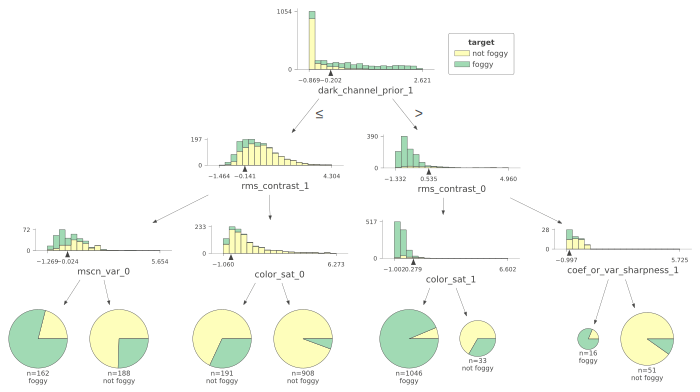

In [28]:

viz_model = dtreeviz.model(
    clf, X_train, y_train,
                target_name="target",
                feature_names= fog_aware_pivot.drop(['photo', 'Label', 'site', 'hour', 'Label_train'],
                                                    axis = 1).columns,  
                   class_names=list(['not foggy', 'foggy']))

viz_model.view()     # render as SVG into internal object 
